In [1]:
# Public Perception of Artificial Intelligence in Society

## Introduction Block

### The goal of this study is to gauge the public perception on the growth of artificial intelligence in society and to see how various demographics respond differently. 
### The survey was made on Qualtrics and its data was collected on Prolific with 25 respondants. 
### This notebook includes 3 csv files which are the raw data results collected from the survey, modified data for R, and the demographic profile of each participant with their Prolific ID.


In [2]:
## Preprocessing Block

### In order for the data to get read into R easier, I modified the Qualtrics raw data file by adding in demographic information from the Prolific file.
### I also changed the multiple choice answers into a numbers ranking system for each question. Each question had a different ranking because of the number of choices.
### For the awareness section of the survey, there is only 1 correct answer per question, so I labeled the correct answer as "1" and incorrect answers as "0".

In [1]:
## Libraries Block

library(tidyverse)
library(psych)
library(dplyr)
library(ggplot2)
library(janitor)
library(car)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'janitor' was built under R version 3.6.2"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Loading required package: carData

Attaching package: 'car'

The following obje

In [3]:
## Read in data 

d <- read_csv("dataForR.csv") %>% janitor::clean_names("snake") %>% glimpse() # reading in the data and making all variables lower case for later cleaning.

## Basic descriptive statistics
summary(d)
head(d)

## Looking at outliers
d %>% filter(age == 'DATA_EXPIRED') # here, we have one outlier respondant from the suvrey, one of the participants' Prolific profile did not have their age.

Parsed with column specification:
cols(
  .default = col_double(),
  StartDate = col_character(),
  EndDate = col_character(),
  Status = col_character(),
  IPAddress = col_character(),
  Finished = col_logical(),
  RecordedDate = col_character(),
  ResponseId = col_character(),
  RecipientLastName = col_logical(),
  RecipientFirstName = col_logical(),
  RecipientEmail = col_logical(),
  ExternalReference = col_logical(),
  DistributionChannel = col_character(),
  UserLanguage = col_character(),
  Q34 = col_character(),
  Age = col_character(),
  Sex = col_character(),
  Race = col_character(),
  Q11 = col_character(),
  Q9 = col_character(),
  Q10 = col_character()
  # ... with 3 more columns
)
See spec(...) for full column specifications.


Observations: 25
Variables: 53
$ start_date           <chr> "7/2/2023 15:03", "7/2/2023 15:14", "7/2/2023 ...
$ end_date             <chr> "7/2/2023 15:06", "7/2/2023 15:20", "7/2/2023 ...
$ status               <chr> "IP Address", "IP Address", "IP Address", "IP ...
$ ip_address           <chr> "162.198.236.108", "174.26.10.164", "67.181.18...
$ progress             <dbl> 100, 100, 100, 100, 100, 100, 100, 100, 100, 1...
$ duration_in_seconds  <dbl> 203, 354, 150, 137, 254, 147, 347, 233, 801, 4...
$ finished             <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE...
$ recorded_date        <chr> "7/2/2023 15:06", "7/2/2023 15:20", "7/2/2023 ...
$ response_id          <chr> "R_1g7QFMEnBREtCvz", "R_1DzMvc6tb5m0SGz", "R_a...
$ recipient_last_name  <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ recipient_first_name <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ recipient_email      <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ external_reference 

  start_date          end_date            status           ip_address       
 Length:25          Length:25          Length:25          Length:25         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    progress   duration_in_seconds finished       recorded_date     
 Min.   :100   Min.   :130.0       Mode:logical   Length:25         
 1st Qu.:100   1st Qu.:156.0       TRUE:25        Class :character  
 Median :100   Median :233.0                      Mode  :character  
 Mean   :100   Mean   :263.3                                        
 3rd Qu.:100   3rd Qu.:297.0           

start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,recipient_last_name,...,q30_4,q30_5,q30_6,q31,q21,q22,q23,q24,q25,q26
7/2/2023 15:03,7/2/2023 15:06,IP Address,162.198.236.108,100,203,TRUE,7/2/2023 15:06,R_1g7QFMEnBREtCvz,NA,...,NA,NA,NA,3,1,1,1,1,1,1
7/2/2023 15:14,7/2/2023 15:20,IP Address,174.26.10.164,100,354,TRUE,7/2/2023 15:20,R_1DzMvc6tb5m0SGz,NA,...,NA,NA,NA,2,1,1,1,0,1,0
7/2/2023 15:19,7/2/2023 15:22,IP Address,67.181.180.211,100,150,TRUE,7/2/2023 15:22,R_agTs9RG3pqwNyFj,NA,...,NA,NA,NA,3,1,1,1,1,1,0
7/2/2023 15:20,7/2/2023 15:23,IP Address,65.29.80.185,100,137,TRUE,7/2/2023 15:23,R_3OizcfGnqT1zfwY,NA,...,NA,NA,NA,1,1,1,1,1,1,1
7/2/2023 15:20,7/2/2023 15:24,IP Address,24.112.55.163,100,254,TRUE,7/2/2023 15:24,R_QmpbWY3BsAXhh4t,NA,...,3,4,5,2,1,1,1,1,1,1
7/2/2023 15:31,7/2/2023 15:33,IP Address,141.126.148.84,100,147,TRUE,7/2/2023 15:33,R_tGa7fberHzGNENb,NA,...,NA,NA,NA,1,1,1,1,1,1,1


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,recipient_last_name,...,q30_4,q30_5,q30_6,q31,q21,q22,q23,q24,q25,q26


In [4]:
## Cleaning data

## Outlier analysis
### To deal with the outlier in the data, I will first replace "DATA_EXPIRED" with "NA" for easier understanding and impute the age by the median age of the rest of the data before creating visualizations.
d$age[d$age == "DATA_EXPIRED"] <- NA

### I noticed that Excel wrote 41 as "4.10E+01" for some reason, so I will replace that value with 41.
d$age[d$age == '4.10E+01'] <- 41

### Because R read in "4.10E+01", age was read in as a character vector, so I will change it to a numeric vector.
d$age <- as.numeric(d$age)  

class(d$age) # checking if age converted from character to numeric

### Imputation of age (median)
d$age[is.na(d$age)] <- median(d$age, na.rm = T)

mean(d$age) # average respondant age was around 35 years
median(d$age) # midpoint of age was 33 years 

d$age

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] "numeric"

[1] 34.96

[1] 33

[1] 62 47 21 26 33 24 37 31 35 21 36 28 33 39 29 54 25 37 28 21 41 30 33 51 52

NULL

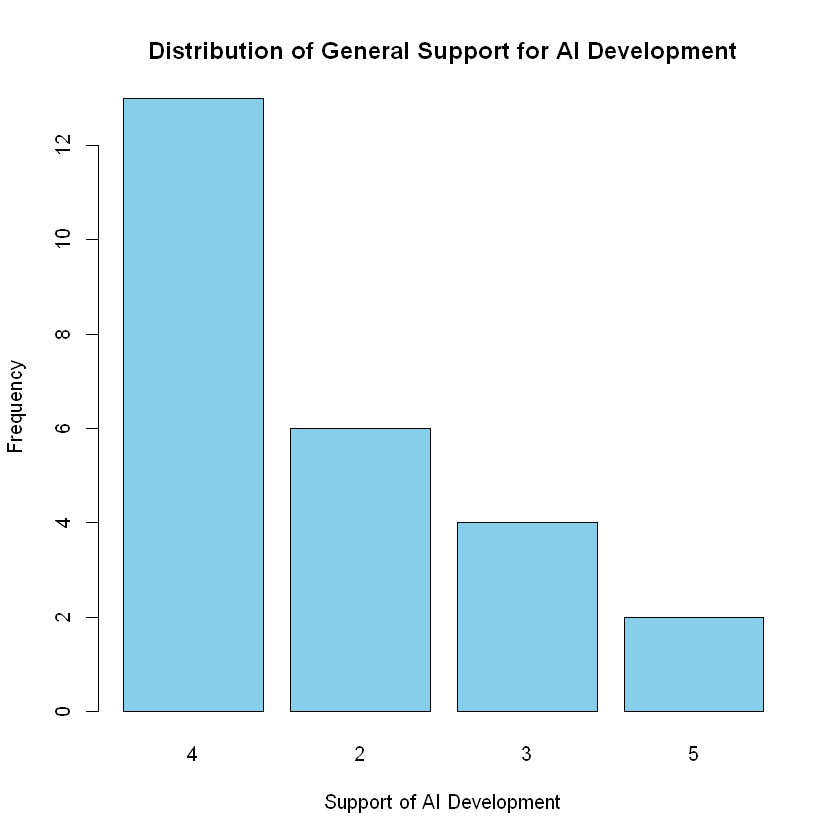

In [141]:
## General Support for AI Development among Respondants

### For this multiple choice question, I did a Likert scale from 1 -5, with 1 being strongly oppose to 5 being strongly support.
### I will first convert the question about support for AI from a numeric variable to an ordinal variable since it is on Likert scale from 1-5.
d$q16 <- factor(d$q16, levels = unique(d$q16), ordered = TRUE)

barplot(table(d$q16), col = "skyblue",
        main = "Distribution of General Support for AI Development",
        xlab = "Support of AI Development", ylab = "Frequency") + theme_bw()

### From this graph we can see that most respondants in general somewhat support future AI development. While this is not particularly informational graph, it does tell us the general landscape of participants' feelings towards AI.

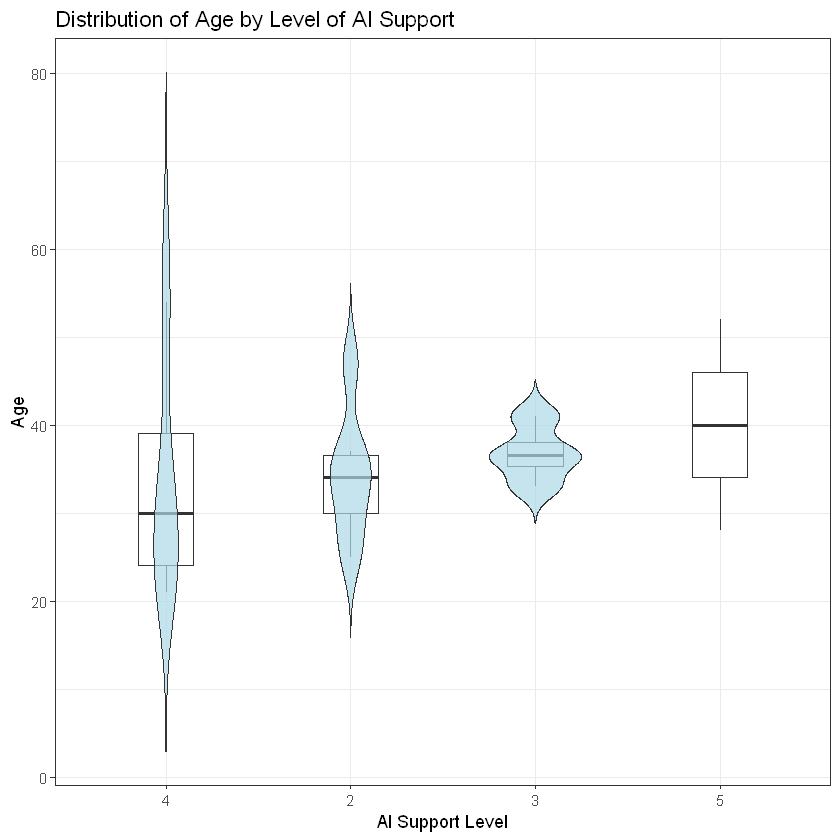

In [142]:
## Relaltionship between Age and AI Support 

ggplot(d, aes(x = q16, y = age)) +
  geom_boxplot(width = 0.3, outlier.shape = NA) +
  geom_violin(width = 0.5, trim = FALSE, fill = "lightblue", alpha = 0.7) +
  labs(title = "Distribution of Age by Level of AI Support",
       x = "AI Support Level", y = "Age") +
  theme_bw()

### From this graph, we see that there is a wide range for support for AI among the age range. The age range for the participants is 21-62.
### Interestly, it seems like participants who are 30-40 years of age do not support AI development or at least negative to it.

In [9]:

d$support <- dplyr::recode(d$q16, "5" = 1, "4" = 1, "3" = 0, "2" = 0)

m2 <-  glm(support ~ q13
           , family = binomial (link = "logit"), data = d)
summary(m2)
car::Anova(m2, type = 3)


Call:
glm(formula = support ~ q13, family = binomial(link = "logit"), 
    data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4823  -1.3153   0.9005   1.0455   1.0455  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.3185     0.4647   0.685    0.493
q13Yes        0.3747     0.9828   0.381    0.703

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 33.651  on 24  degrees of freedom
Residual deviance: 33.502  on 23  degrees of freedom
AIC: 37.502

Number of Fisher Scoring iterations: 4


,LR Chisq,Df,Pr(>Chisq)
q13,0.1484928,1,0.6999799


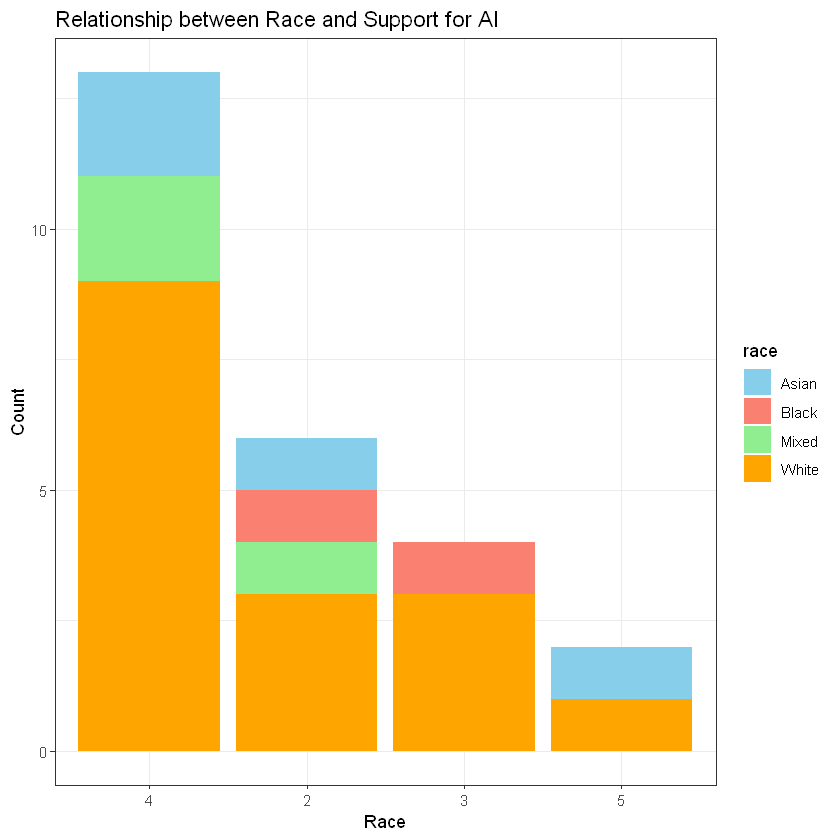

In [82]:
## Relationship between Race and AI Support

ggplot(d, aes(x = q16, fill = race)) +
  geom_bar() +
  labs(title = "Relationship between Race and Support for AI",
       x = "Support for AI", y = "Count") +
  scale_fill_manual(values = c("skyblue", "salmon", "lightgreen", "orange")) +
  theme(legend.position = "bottom") + theme_bw()

### The greatest proportion of support among participants is those who are White responding that they mostly somewhat support AI development, with Asian respondants being the second most group..
### We can also see a trend among participants in that those of minority race such as Asian, Black, and Mixed tend to be more negative responding with somewhat oppose.

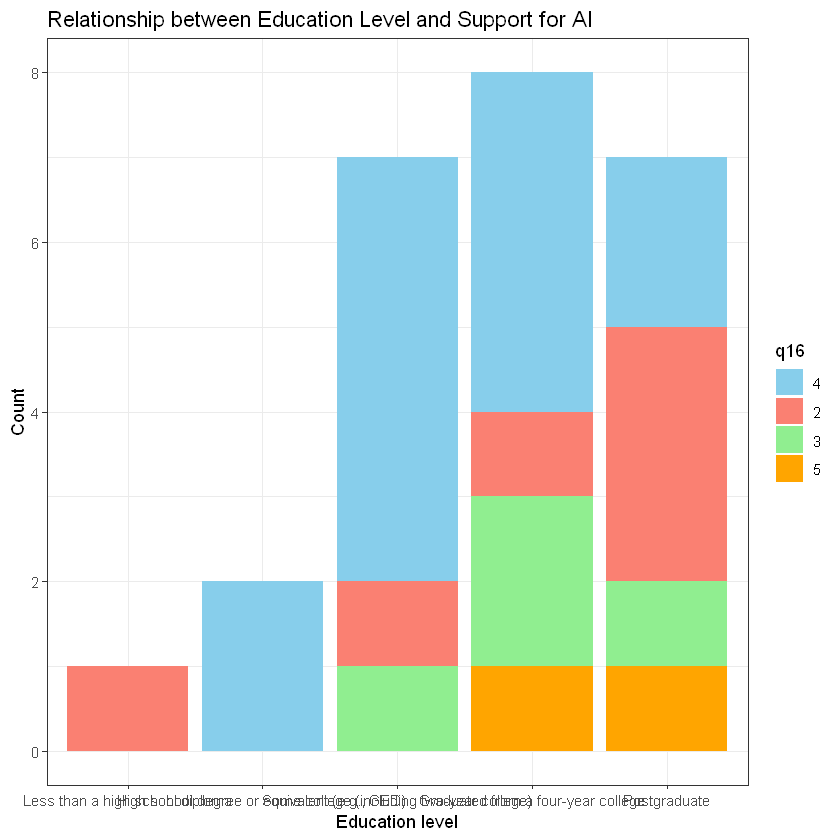

In [144]:
## Relationship Between Education Level and Support for AI

### converting character vector to a leveled factor
d$q11 <- factor(d$q11, levels = c("Less than a high school diploma", "High school degree or equivalent (e.g., GED)", "Some college (including two-year college)", "Graduated from a four-year college", "Postgraduate"), ordered = TRUE)

## graphing
ggplot(d, aes(x = q11, fill = q16)) +
  geom_bar() +
  labs(title = "Relationship between Education Level and Support for AI",
       x = "Education level", y = "Count") +
  scale_fill_manual(values = c("skyblue", "salmon", "lightgreen", "orange", "pink")) +
  theme(legend.position = "bottom") + theme_bw()

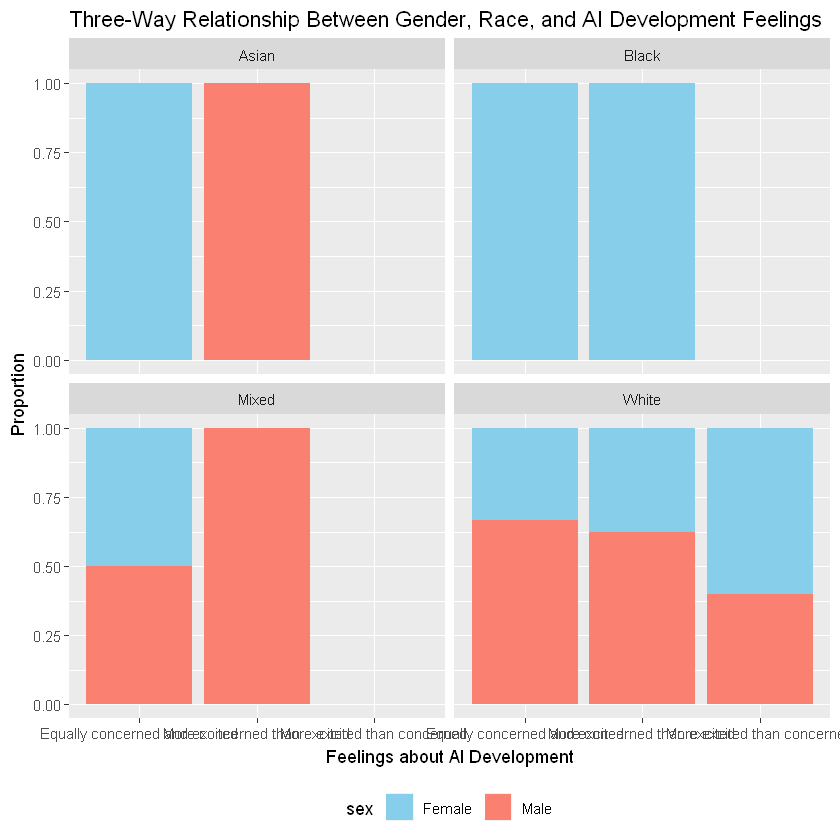

In [5]:
## Relationship between Gender and Race and Excitement of AI Development

### Replacing numbers with raw data
d$q17[d$q17 == "1"] <- "Equally concerned and excited" 

d$q17[d$q17 == "2"] <- "More concerned than excited"

d$q17[d$q17 == "3"] <- "More excited than concerned"

### I will leave this as a categorical variable since there are no inherent levels.

ggplot(d, aes(x = q17, fill = sex)) +
  geom_bar(position = "fill") +
  facet_wrap(~race) +
  labs(title = "Three-Way Relationship Between Gender, Race, and AI Development Feelings",
       x = "Feelings about AI Development", y = "Proportion") +
  scale_fill_manual(values = c("skyblue", "salmon")) +
  theme(legend.position = "bottom")

### what we can see is that all participants that were of minority ethnicity were either equally concerned about AI or were more concerned about AI.
### Most female white participants were more excited about AI and for male white participants, they were either concerned and neutral.


start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,recipient_last_name,...,q30_4,q30_5,q30_6,q31,q21,q22,q23,q24,q25,q26
7/2/2023 15:03,7/2/2023 15:06,IP Address,162.198.236.108,100,203,TRUE,7/2/2023 15:06,R_1g7QFMEnBREtCvz,NA,...,NA,NA,NA,3,1,1,1,1,1,1
7/2/2023 15:31,7/2/2023 15:35,IP Address,174.196.130.86,100,233,TRUE,7/2/2023 15:35,R_1DC05Mf3UdIddIr,NA,...,NA,NA,NA,1,1,1,1,0,1,1
7/2/2023 15:29,7/2/2023 15:37,IP Address,70.93.39.198,100,479,TRUE,7/2/2023 15:37,R_2fE7XC7qnWgqkP7,NA,...,NA,NA,NA,3,1,1,1,1,1,1
7/2/2023 15:41,7/2/2023 15:45,IP Address,166.199.98.43,100,215,TRUE,7/2/2023 15:45,R_1pS5yWfdWWnrTn6,NA,...,NA,NA,NA,1,1,1,0,1,1,1
7/2/2023 15:46,7/2/2023 15:53,IP Address,174.198.7.174,100,386,TRUE,7/2/2023 15:53,R_22EA3GQK56y5Yuf,NA,...,NA,NA,NA,3,1,1,1,1,1,1


NULL

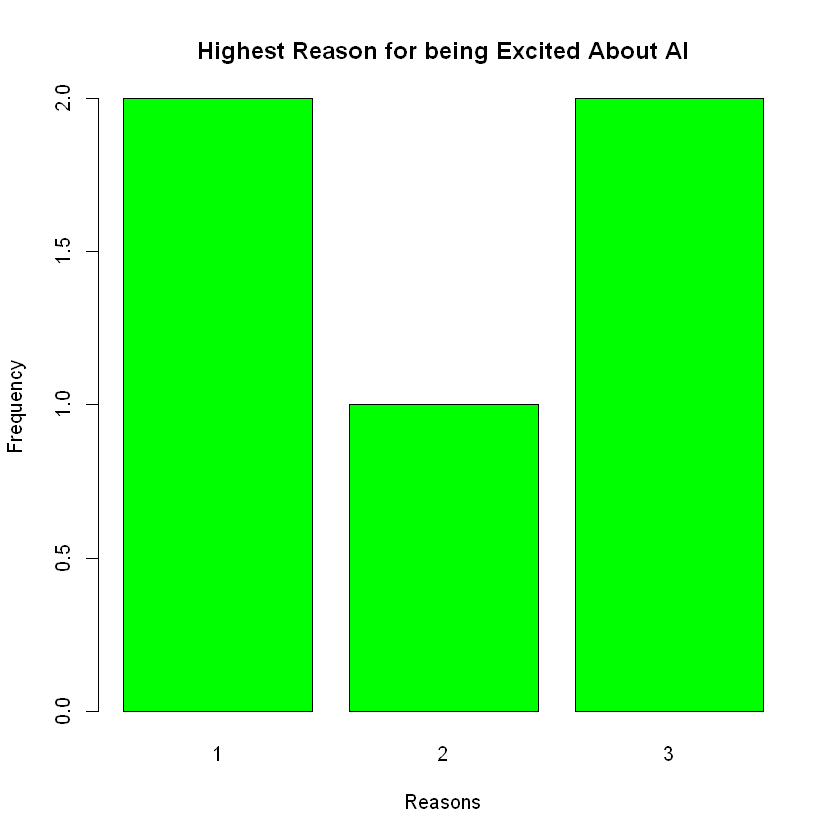

NULL

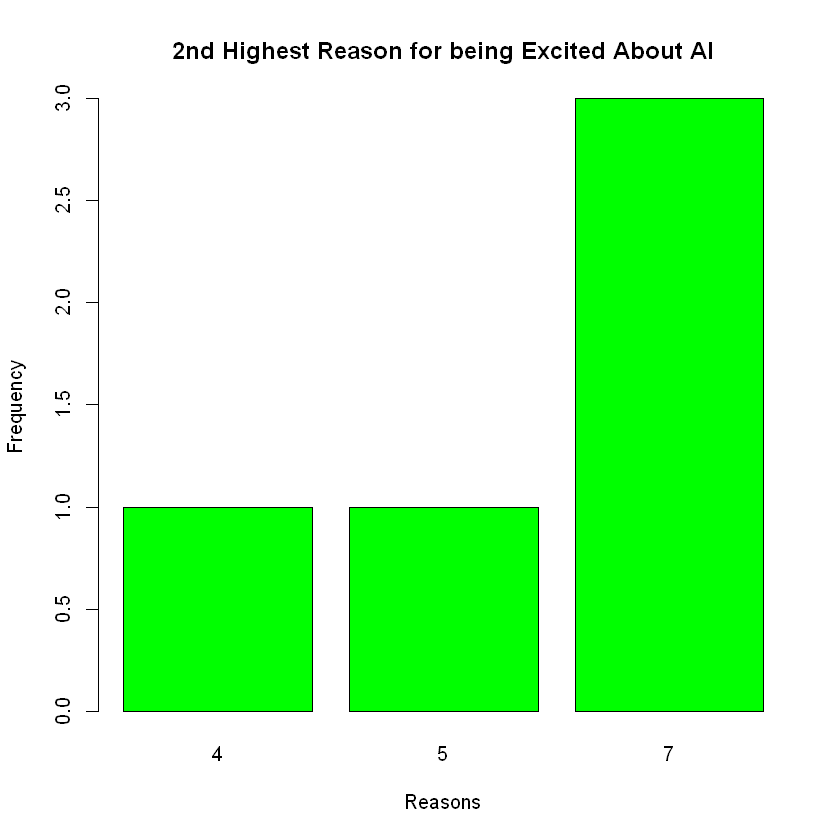

NULL

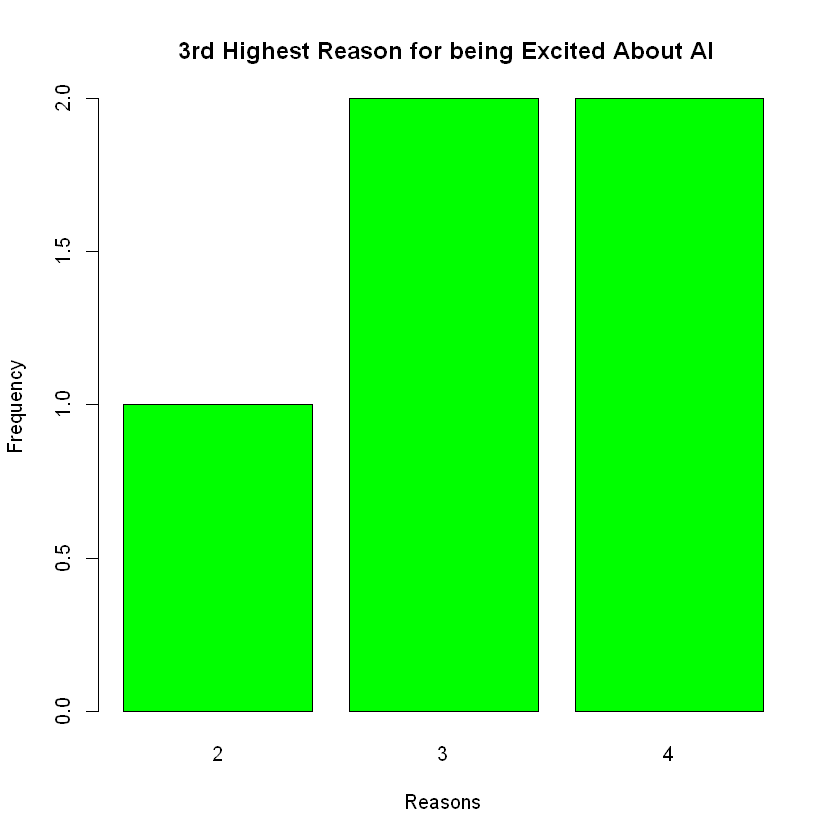

In [126]:
## Participants reasons for being more excited about AI

### creating a new dataset for participants who are more excited about AI

selected_rows <- c(1, 8, 10, 20, 25)

d_excited <- d[selected_rows, ]

d_excited 

### Graphing Frequency of Top 3 Participant Responses

### Highest ranking reason
barplot(table(d_excited$q29_1), col = "green",
        main = "Highest Reason for being Excited About AI",
        xlab = "Reasons", ylab = "Frequency") + theme_bw()

### We can see that the top reason for participant's excitment about AI is "Saves time and is more efficient".

### 2nd ranking reason
barplot(table(d_excited$q29_2), col = "green",
        main = "2nd Highest Reason for being Excited About AI",
        xlab = "Reasons", ylab = "Frequency") + theme_bw()

### 3rd ranking reason
barplot(table(d_excited$q29_3), col = "green",
        main = " 3rd Highest Reason for being Excited About AI",
        xlab = "Reasons", ylab = "Frequency") + theme_bw()


start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,recipient_last_name,...,q30_4,q30_5,q30_6,q31,q21,q22,q23,q24,q25,q26
7/2/2023 15:20,7/2/2023 15:24,IP Address,24.112.55.163,100,254,TRUE,7/2/2023 15:24,R_QmpbWY3BsAXhh4t,NA,...,3,4,5,2,1,1,1,1,1,1
7/2/2023 15:22,7/2/2023 15:35,IP Address,104.229.81.227,100,801,TRUE,7/2/2023 15:35,R_1P5GVAE2iVh8KdO,NA,...,3,6,2,2,1,1,1,1,1,1
7/2/2023 15:33,7/2/2023 15:37,IP Address,73.171.63.183,100,196,TRUE,7/2/2023 15:37,R_Y3ygAMbN0scClUd,NA,...,2,6,1,2,1,1,1,1,1,1
7/2/2023 15:38,7/2/2023 15:41,IP Address,174.171.45.67,100,156,TRUE,7/2/2023 15:41,R_1HivcHttvGVxDmH,NA,...,1,6,4,2,1,1,1,1,1,1
7/2/2023 15:38,7/2/2023 15:41,IP Address,108.207.58.153,100,184,TRUE,7/2/2023 15:41,R_ZC3Xm1tEiKuG1Wx,NA,...,2,3,4,1,1,1,1,1,1,1
7/2/2023 15:37,7/2/2023 15:41,IP Address,24.250.209.251,100,251,TRUE,7/2/2023 15:41,R_3qlzu9ZYLKGIvw5,NA,...,2,3,1,2,1,1,1,1,1,0
7/2/2023 15:37,7/2/2023 15:42,IP Address,67.8.119.121,100,262,TRUE,7/2/2023 15:42,R_dhCZLL2HHvPvruV,NA,...,1,2,3,2,1,1,1,1,1,1
7/2/2023 15:38,7/2/2023 15:42,IP Address,108.21.227.180,100,266,TRUE,7/2/2023 15:42,R_d6e7jJVZrXLBdUl,NA,...,3,4,2,2,1,1,1,1,1,1
7/2/2023 15:42,7/2/2023 15:45,IP Address,24.128.78.124,100,201,TRUE,7/2/2023 15:46,R_29sRXDakNUReDnj,NA,...,2,5,1,3,1,1,1,1,1,1
7/2/2023 15:45,7/2/2023 15:47,IP Address,172.222.144.137,100,137,TRUE,7/2/2023 15:48,R_1Qa55CeF535njsi,NA,...,1,6,3,3,0,0,1,1,0,0


NULL

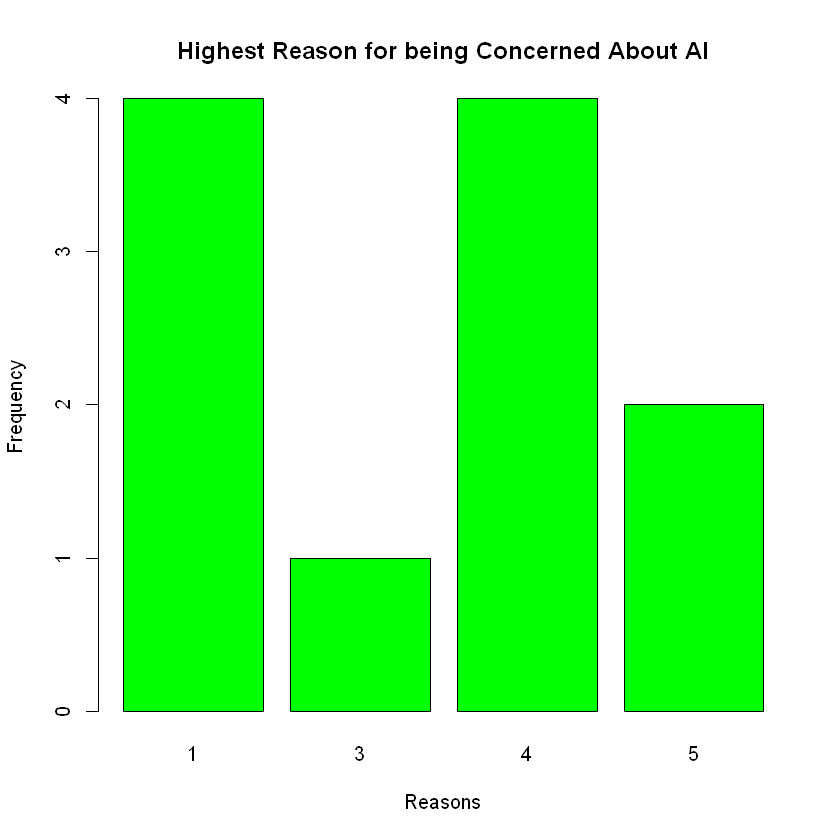

NULL

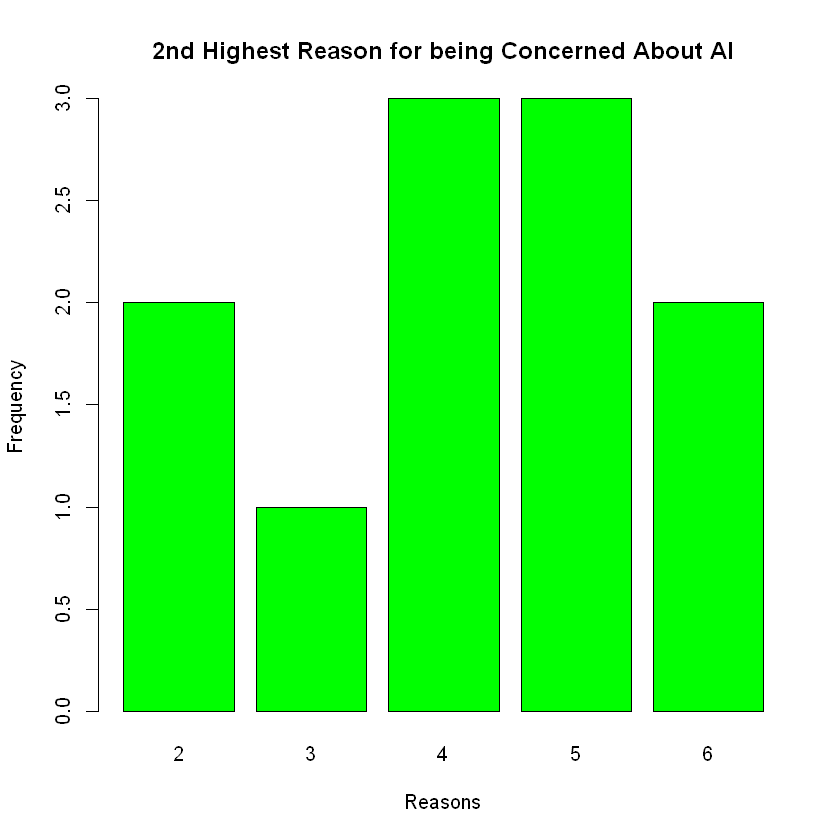

NULL

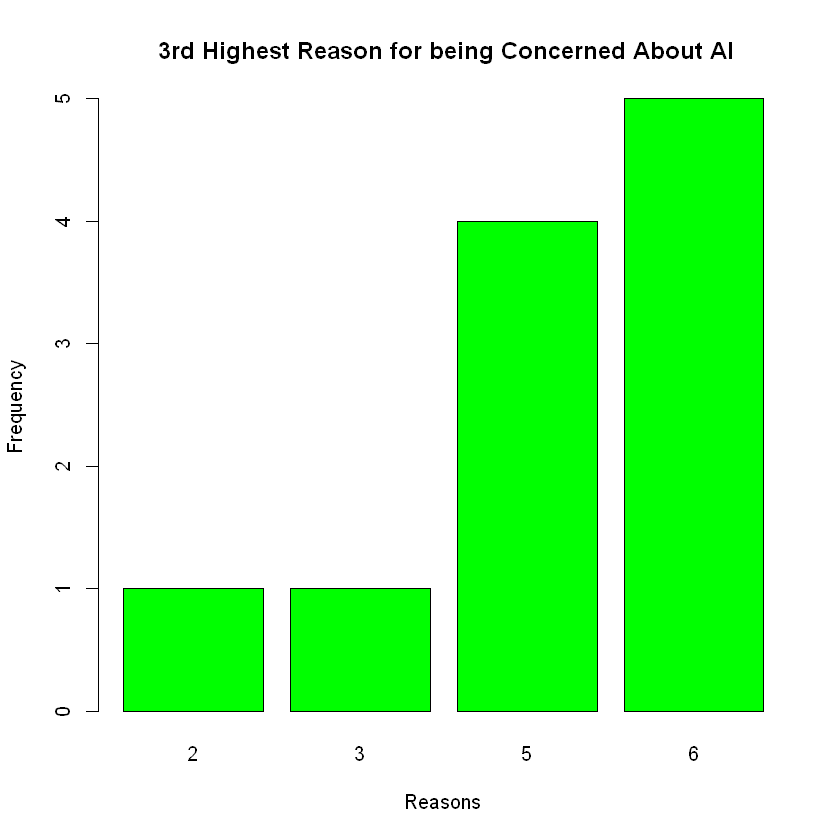

In [128]:
## Participants rasons for being more concerned about AI

### creating a new dataset for participants who are more concerned about AI

select_rows <- c(5, 9, 11, 14, 15, 16, 17, 18, 21, 22, 24)

d_concerned <- d[select_rows, ]

d_concerned

### Graphing Frequency of Top 3 Participant Responses

### Highest ranking reason
barplot(table(d_concerned$q30_1), col = "green",
        main = "Highest Reason for being Concerned About AI",
        xlab = "Reasons", ylab = "Frequency") + theme_bw()

### We can see that the top reason for participant's concern about AI is both digital privacy conerns and people misuing AI.

### 2nd ranking reason
barplot(table(d_concerned$q30_2), col = "green",
        main = "2nd Highest Reason for being Concerned About AI",
        xlab = "Reasons", ylab = "Frequency") + theme_bw()

### 3rd ranking reason
barplot(table(d_concerned$q30_3), col = "green",
        main = " 3rd Highest Reason for being Concerned About AI",
        xlab = "Reasons", ylab = "Frequency") + theme_bw()
